# Seleção usando regressão logística com regularização L1 (abordagem 1)

## 1. Carregando módulos e dados

In [2]:
# Manipulação dos dados
import numpy  as np
import scipy  as sp
import pandas as pd

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn           as sns
%matplotlib inline

In [3]:
# Carregando os dados
dados = pd.read_csv('../../Dados/abordagem1.csv')

In [4]:
# Pré-processamento dos dados
# Pré-processamento dos dados
dados.replace(['TB+','TB-','Sim','Não','Branco','Não branco','Positivo','Negativo','ignorado','Masculino','Feminino'],[1,0,1,-1,1,-1,1,-1,0,1,-1],inplace=True)
dados.Idade.replace(999,45,inplace=True)
dados.Idade = (dados.Idade - np.mean(dados.Idade))/np.std(dados.Idade)

## 2. Seleção de variáveis utilizando RL c L1

### 2.1 Seleção utilizando +1/-1/0

In [13]:
from sklearn.linear_model      import LogisticRegression as LR
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection   import cross_val_score
from sklearn.model_selection   import GridSearchCV
from sklearn.model_selection   import StratifiedKFold as SKF
from sklearn.metrics           import roc_auc_score

In [14]:
y = dados.desfecho
X = dados.drop(['desfecho'],axis=1)

In [28]:
list(X.columns)

['TTO_anterior_TB_triagem_enfermeiro',
 'Cicatriz_BCG',
 'Idade',
 'Sexo',
 'Raça',
 'Tem_companheiro',
 'Tosse',
 'Semanas_tosse',
 'Expectoração',
 'Hemoptóicos',
 'Hemoptise',
 'Sudorese_noturna',
 'Febre',
 'Dispnéia',
 'Perda_de_apetite',
 'Perda_peso_10percent',
 'Dor_torácica',
 'Internação_hospital_2anos',
 'Prisão_2anos',
 'Delegacia_2anos',
 'Contato_TBP_2anos',
 'CAGE',
 'Estado_civil_Casado',
 'Estado_civil_Separado',
 'Estado_civil_Solteiro',
 'Estado_civil_ignorado',
 'Estado_civil_viúvo',
 'Fuma_Ex-fumante',
 'Fuma_Fumante',
 'Fuma_Jamais fumante',
 'Fuma_ignorado']

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.19580998,  0.        ,  0.        ,  0.18335452,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

Automatically created module for IPython interactive environment
Computing regularization path ...
This took  0:00:01.424934


ValueError: x and y must have same first dimension

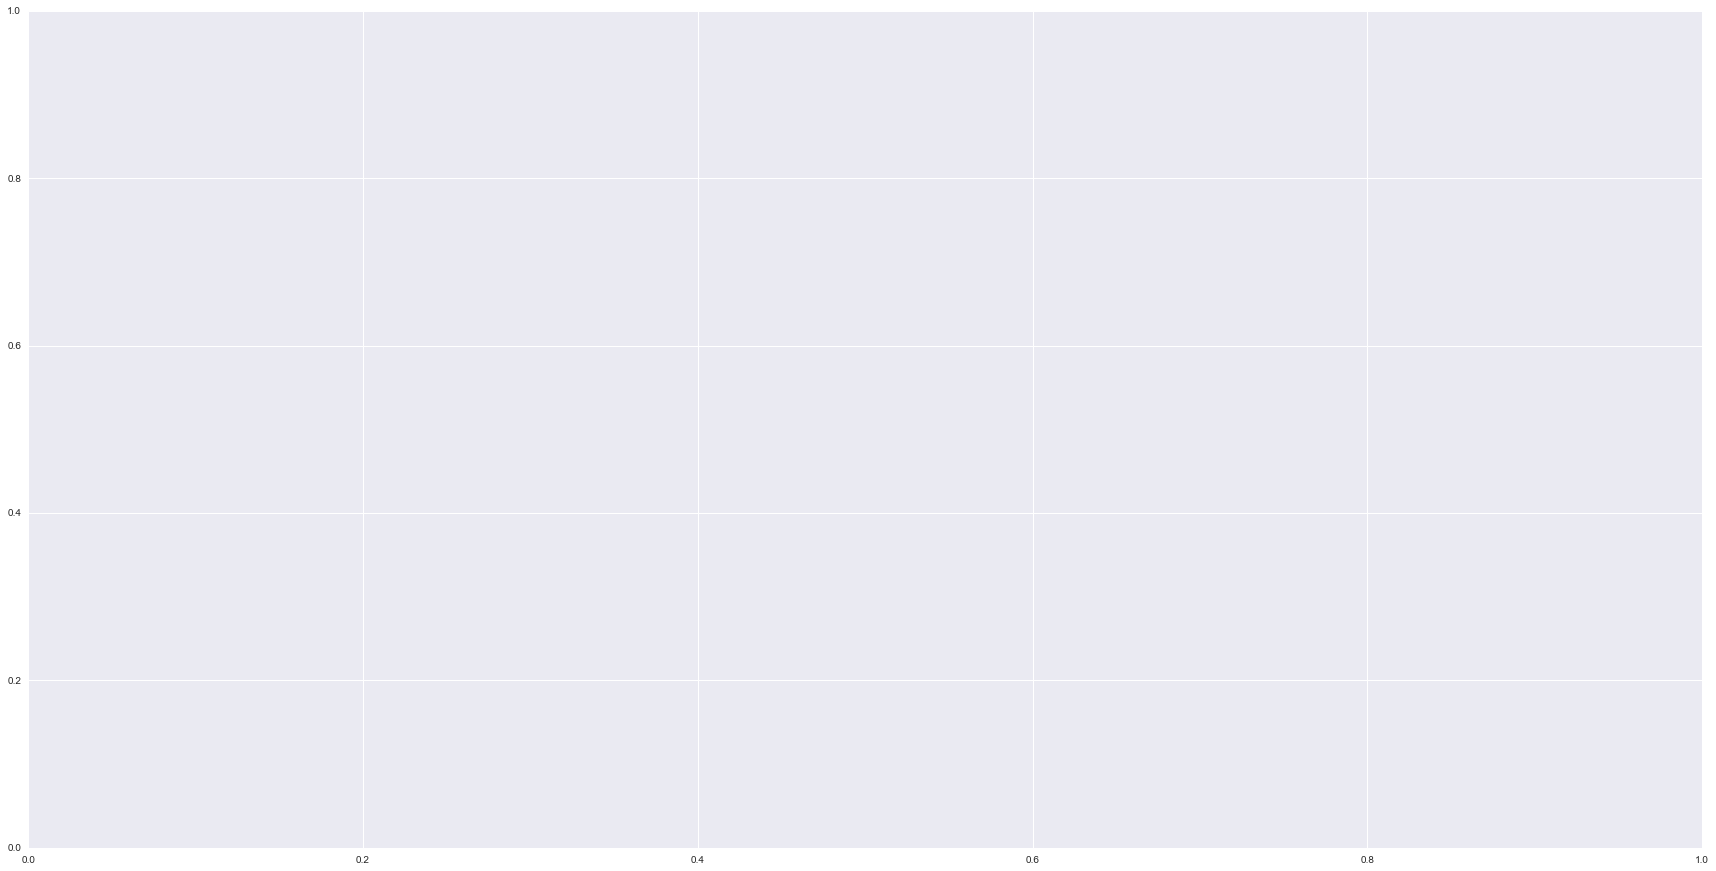

In [37]:
print(__doc__)

# Author: Alexandre Gramfort <alexandre.gramfort@inria.fr>
# License: BSD 3 clause

from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn import datasets
from sklearn.svm import l1_min_c

cs = l1_min_c(X, y, loss='log') * np.logspace(0, 3)


print("Computing regularization path ...")
start = datetime.now()
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
coefs_ = []
for c in cs:
    clf.set_params(C=c)
    clf.fit(X, y)
    coefs_.append(clf.coef_.ravel().copy())
print("This took ", datetime.now() - start)

plt.figure(figsize=(30,15))
coefs_ = np.array(coefs_)

# for index, coef in enumerate(coefs_):
#     plt.hold(True)
#     plt.plot(np.log10(cs), coef,label=X.columns[index])

# for y_arr, label in zip(y, labels):
#     plt.plot(x, y_arr, label=label)

labels = list(X.columns)

for y_arr, label in zip(coefs_,labels):
    plt.plot(np.log10(cs), y_arr, label=label)
    
    
#plt.plot(np.log10(cs), coefs_,)
    
ymin, ymax = plt.ylim()
plt.xlabel('log(C)',fontsize=20)
plt.ylabel('Coefficientes',fontsize=20)
plt.title('Logistic Regression Path',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend()
plt.axis('tight')
plt.show()

Automatically created module for IPython interactive environment
Computing regularization path ...
This took  0:00:01.372554


/Users/Michel/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


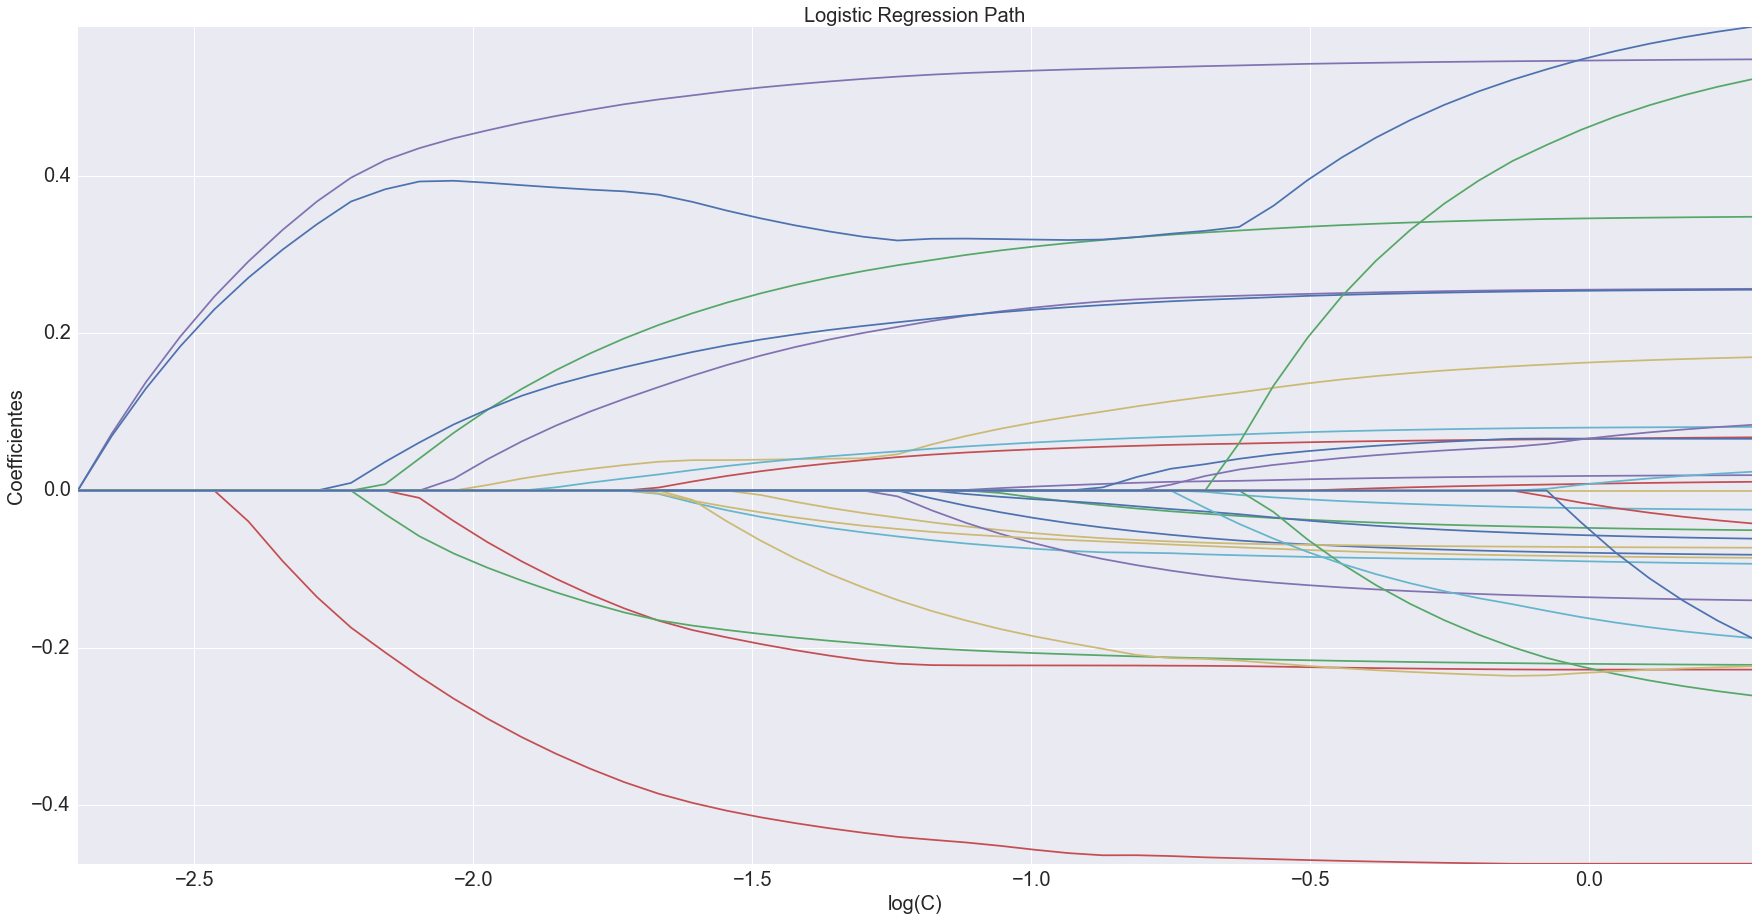

In [36]:
print(__doc__)

# Author: Alexandre Gramfort <alexandre.gramfort@inria.fr>
# License: BSD 3 clause

from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn import datasets
from sklearn.svm import l1_min_c

cs = l1_min_c(X, y, loss='log') * np.logspace(0, 3)


print("Computing regularization path ...")
start = datetime.now()
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
coefs_ = []
for c in cs:
    clf.set_params(C=c)
    clf.fit(X, y)
    coefs_.append(clf.coef_.ravel().copy())
print("This took ", datetime.now() - start)

plt.figure(figsize=(30,15))
coefs_ = np.array(coefs_)

# for index, coef in enumerate(coefs_):
#     plt.hold(True)
#     plt.plot(np.log10(cs), coef,label=X.columns[index])

plt.plot(np.log10(cs), coefs_,)
    
ymin, ymax = plt.ylim()
plt.xlabel('log(C)',fontsize=20)
plt.ylabel('Coefficientes',fontsize=20)
plt.title('Logistic Regression Path',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend()
plt.axis('tight')
plt.show()

In [38]:
np.log10(cs)

array([-2.70884564, -2.64762115, -2.58639666, -2.52517217, -2.46394768,
       -2.40272319, -2.3414987 , -2.28027421, -2.21904972, -2.15782523,
       -2.09660074, -2.03537625, -1.97415176, -1.91292727, -1.85170278,
       -1.79047829, -1.7292538 , -1.66802931, -1.60680482, -1.54558033,
       -1.48435584, -1.42313135, -1.36190686, -1.30068237, -1.23945788,
       -1.17823339, -1.1170089 , -1.05578441, -0.99455992, -0.93333543,
       -0.87211094, -0.81088645, -0.74966196, -0.68843747, -0.62721298,
       -0.5659885 , -0.50476401, -0.44353952, -0.38231503, -0.32109054,
       -0.25986605, -0.19864156, -0.13741707, -0.07619258, -0.01496809,
        0.0462564 ,  0.10748089,  0.16870538,  0.22992987,  0.29115436])

In [41]:
coefs_[1]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.07274735,  0.        ,  0.        ,  0.06968703,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [15]:
# Procedimento de Nested K-fold Cross-validation

# Garante a representação da classe minoritária em cada fold; estratificada
kf = SKF(n_splits=10,random_state = 0, shuffle=True)

dict_test = dict()
dict_val  = dict()

# Lista com os parâmetros C
param = np.linspace(0.01,1,num=1000)

for k in param:
    
    rl = LR(penalty='l1',C=k)
    
    # armazena os scores de validação para um determinado parâmetro
    val_scores  = []
    test_scores = []
    
    for train_index, test_index in kf.split(X,y):
        
#         # Divide o treino em dados e target
#         y_train = y_res.loc[train_index]
#         X_train = X_res.loc[train_index]

        y_train = y.loc[train_index]
        X_train = X.loc[train_index]
        
        # Armazena os valores da validação cruzada (interna)
        val_scores.extend(cross_val_score(rl,X_train,y_train,cv=10,scoring='roc_auc'))
        
        # Treinamento com o conjunto de dados k-fold externo
#         X_test = X_res.loc[test_index]
#         y_test = y_res.loc[test_index]
        X_test = X.loc[test_index]
        y_test = y.loc[test_index]
        
        # Score de treinamento
        y_pred = rl.fit(X_train,y_train).predict(X_test)
        test_scores.append(roc_auc_score(y_test,y_pred))
        
        # Armazenar em um vetor de treino; busca por dict
        
        
    dict_test[k] = test_scores 
    dict_val[k]  = val_scores  

KeyboardInterrupt: 

In [ ]:
# Resultados 

validacao = list(dict_val.values())
teste = list(dict_test.values())

sns.set_style('whitegrid')
ticks = list(range(1,51,2))

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

plt.figure(figsize=(30,10))

bpl = plt.boxplot(validacao, positions=np.array(range(len(validacao)))*2.0-0.4, sym='', widths=0.6)
bpr = plt.boxplot(teste, positions=np.array(range(len(teste)))*2.0+0.4, sym='', widths=0.6)
set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#2C7BB6')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#D7191C', label='Validação')
plt.plot([], c='#2C7BB6', label='Teste')
plt.legend(fontsize=20)

plt.title('Boxplot dos escores de teste e validação da validação cruzada aninhada',fontsize=20)
plt.xticks(range(0, len(ticks) * 2, 2), ticks,fontsize=20)
plt.ylabel('AUROC',fontsize=20)
plt.xlabel('Número de vizinhos',fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [ ]:
#fim

In [65]:
# Busca pelo C que maximiza roc_auc
param = np.linspace(0.01,1,num=1000)

# grid de parâmetros
parameters = {'C' : param}

# Fit do método
clf = GridSearchCV(LR(penalty='l1'),parameters,scoring='roc_auc',n_jobs=-1)


In [66]:
# Rodado e refinado algumas vezes, diminuindo a cada execução o tamanho da busca manualmente
clf.best_estimator_

LogisticRegression(C=0.065495495495495493, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [68]:
clf = LR(C=0.065,penalty='l1',max_iter=1000)

In [76]:
clf.fit(X[:-1],y[:-1])

LogisticRegression(C=0.065, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [77]:
clf.coef_

array([[-0.01068089,  0.        , -0.44266678,  0.21402701, -0.03848376,
        -0.06383206, -0.00256517,  0.29082198, -0.21792436, -0.02321841,
         0.05766944,  0.05313716,  0.21875521, -0.1989515 ,  0.        ,
         0.52984867, -0.05065943,  0.        ,  0.32084995,  0.        ,
         0.0458898 ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -0.15557411,  0.        ,
         0.        ]])

In [73]:
clf.coef_[0][1] == 0

True

In [78]:
clf.fit(X[:-1],y[:-1])

LogisticRegression(C=0.065, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [79]:
clf.coef_

array([[-0.010708  ,  0.        , -0.44267758,  0.21401979, -0.03847457,
        -0.06382915, -0.00219018,  0.29076502, -0.21800369, -0.02319666,
         0.05754204,  0.05311277,  0.2187597 , -0.19899215,  0.        ,
         0.52985572, -0.05063138,  0.        ,  0.32125467,  0.        ,
         0.04583811,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -0.15556311,  0.        ,
         0.        ]])

In [84]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(y.loc[-1])

In [16]:
C = np.linspace(0.001,100,num=10000)

In [17]:
dict_features_normal      = dict()

for reg_value in C[:1000]:
    features_escolhidas = []
    clf = LR(penalty='l1',C=reg_value,random_state=0)
    clf.fit(X,y)
    
    for index, feature in enumerate(clf.coef_.tolist()[0]):
        if feature != 0:
            features_escolhidas.append(X.columns[index])
        
    dict_features_normal[reg_value] = features_escolhidas

In [18]:
valores_normal = []
for reg_values in C[:1000]:
    print(reg_values, len(dict_features_normal[reg_values]))
    valores_normal.append(len(dict_features_normal[reg_values]))

0.001 0
0.01100090009 8
0.02100180018 11
0.03100270027 15
0.04100360036 16
0.05100450045 16
0.0610054005401 18
0.0710063006301 19
0.0810072007201 20
0.0910081008101 20
0.1010090009 20
0.11100990099 20
0.12101080108 20
0.13101170117 21
0.14101260126 21
0.15101350135 21
0.16101440144 21
0.17101530153 22
0.18101620162 22
0.19101710171 22
0.2010180018 22
0.21101890189 22
0.22101980198 23
0.23102070207 24
0.24102160216 24
0.25102250225 24
0.26102340234 24
0.27102430243 24
0.28102520252 24
0.29102610261 24
0.3010270027 24
0.31102790279 25
0.32102880288 25
0.33102970297 26
0.34103060306 27
0.35103150315 28
0.36103240324 28
0.37103330333 28
0.38103420342 27
0.39103510351 27
0.4010360036 27
0.41103690369 27
0.42103780378 28
0.43103870387 28
0.44103960396 28
0.45104050405 28
0.46104140414 28
0.47104230423 27
0.48104320432 27
0.49104410441 27
0.5010450045 27
0.51104590459 27
0.52104680468 27
0.53104770477 27
0.54104860486 27
0.55104950495 27
0.561050405041 27
0.571051305131 27
0.581052205221 28
0

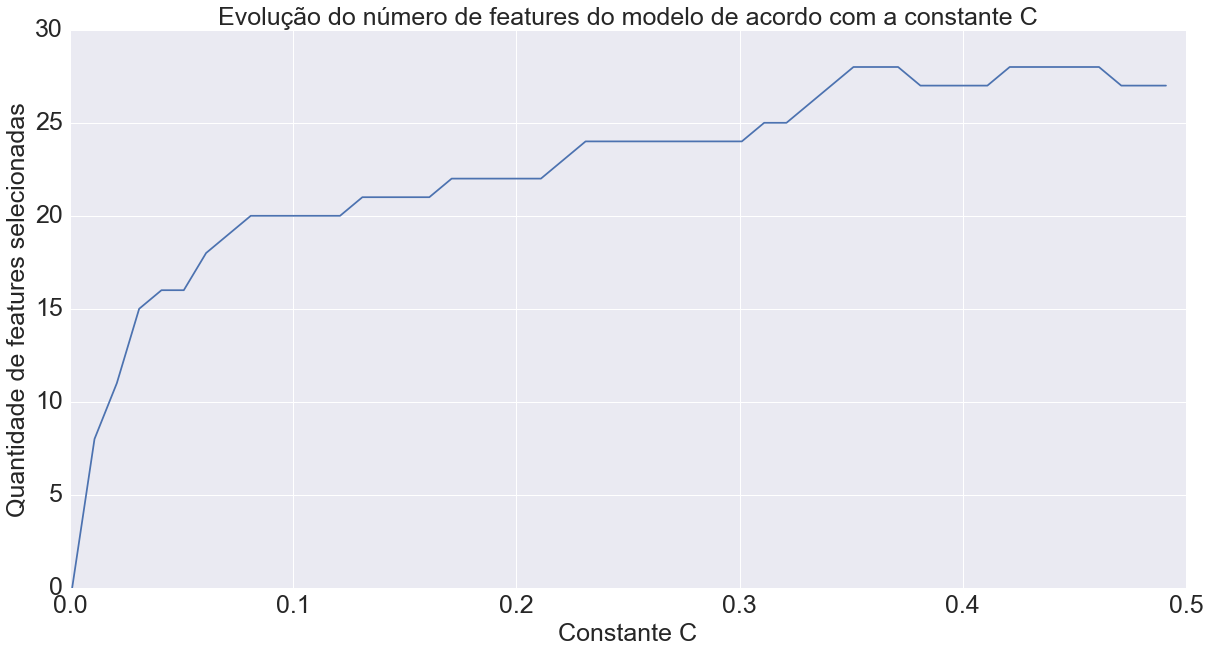

In [19]:
x = np.array(valores_normal)

plt.figure(figsize=(20,10))
plt.title('Evolução do número de features do modelo de acordo com a constante C',fontsize=25)
plt.xlabel('Constante C',fontsize=25)
plt.xticks(fontsize=25)
plt.ylabel('Quantidade de features selecionadas',fontsize=25)
plt.yticks(fontsize=25)
plt.plot(C[:50],x[:50])
plt.show()

## 2.2 One-hot encoding Full

In [20]:
dados_one_hot_full

,desfecho,Idade,TTO_anterior_TB_triagem_enfermeiro_Não,TTO_anterior_TB_triagem_enfermeiro_Sim,TTO_anterior_TB_triagem_enfermeiro_ignorado,Cicatriz_BCG_Não,Cicatriz_BCG_Sim,Cicatriz_BCG_ignorado,Sexo_Feminino,Sexo_Masculino,...,Contato_TBP_2anos_Não,Contato_TBP_2anos_Sim,Contato_TBP_2anos_ignorado,Fuma_Ex-fumante,Fuma_Fumante,Fuma_Jamais fumante,Fuma_ignorado,CAGE_Não,CAGE_Sim,CAGE_ignorado
0,TB+,30,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,TB+,53,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,TB+,84,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,TB+,18,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,TB+,36,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,TB+,71,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6,TB+,26,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7,TB+,22,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
8,TB+,54,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
9,TB+,52,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [21]:
C = np.linspace(0.01,100,num=5000)

In [22]:
y = dados_one_hot_full.desfecho
y.replace(['TB+','TB-'],[1,0],inplace=True)
X = dados_one_hot_full.drop(['desfecho'],axis=1)

In [24]:
X.Idade = (X.Idade - np.mean(X.Idade))/(np.std(X.Idade))

In [25]:
# teste logistica
clf = LR(penalty='l1',C=0.01)

In [26]:
clf.fit(X,y)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [ ]:
# Loop para verificar quantas features são escolhidas para determinado número de C

dict_features      = dict()

for reg_value in C:
    features_escolhidas = []
    clf = LR(penalty='l1',C=reg_value)
    clf.fit(X,y)
    
    for index, feature in enumerate(clf.coef_.tolist()[0]):
        if feature != 0:
            features_escolhidas.append(X.columns[index])
        
    dict_features[reg_value] = features_escolhidas

In [ ]:
valores = []
for reg_values in C:
    print(reg_values, len(dict_features[reg_values]))
    valores.append(len(dict_features[reg_values]))

In [ ]:
C

In [24]:
type(valores)

list

In [29]:
x = np.array(valores)

In [30]:
x

array([ 2,  9, 12, ..., 73, 73, 73])

In [31]:
C.shape

(5000,)

In [32]:
x.shape

(5000,)

In [ ]:

plt.figure(figsize=(20,10))
plt.title('Evolução do número de features do modelo de acordo com a constante C',fontsize=25)
plt.xlabel('Constante C',fontsize=25)
plt.xticks(fontsize=25)
plt.ylabel('Quantidade de features selecionadas',fontsize=25)
plt.yticks(fontsize=25)
plt.plot(C[:100],x[:100])
plt.show()

In [41]:
for i in clf.coef_:
    print(i + 1)
    print()

[ 0.97859874  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.4672027   1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.        ]



In [58]:
a = clf.coef_.tolist()[0]

In [60]:
a[0]

-0.021401258840983792